 Stufe 1 Lade das Iris Beispiel!

 Tipp: benutze from sklearn.datasets.load_iris() statt des Frochte-Codes zum Laden von Iris
 	Falls es merkwürdige Ergebnisse beim Laden gibt, lohnt es sich , kurz in die Dokumentation zu schauen
 Trenne XTrain und XTest. Eine oder mehrere Zeile(n) in XTest kann benutzt werden, um die Voraussage zu testen.
 (Dies ist eine grobe Vereinfachung!)
 Schreibe eine Klasse für knn-Klassifizierung
 Gehe davon aus dass in XTrain und yTrain eine feste bekannte Zuordnung von Datensätzen und Labels vorliegt.
 Es gibt 2 Möglichkeiten für das fit, entscheide Dich für eine
 a) fit tut gar nichts
 b) fit berechnet schon mal alle Distanzen zwischen allen Punkten aus XTrain
 Schreibe das predict für einen neuen Datensatz (1-dimensional !)

 Stufe 2:
 Schreibe die jeweils andere Variante der Klasse.
 Schreibe das predict für mehrere Datensätze (2-dimensional)
 Teste mit einem einzelnen Datensatz (1-dimensionales Array). Was musst Du vorher tun?

 Stufe 3:
 Schreibe danach eine Variante, die im Predict keinen Mehrheitsentscheid benutzt.
 Sondern berechne eine Voraussage,die von der Häufigkeit der Klassen und dem Abstand der Nachbarn in der k-Nachbarschaft abhängt.
 Die Klasse des Nachbars soll um so wichtiger sein, je näher dieser an xQuery liegt.
 Schau dir die Qualität der Voraussage mit verschiedenen Werten von k an.

 Stufe 4:
 Lies den Teil in Frochtes Buch , wo er die Regression beschreibt und lasse den Code laufen
 Experimentiere mit k und smear

 # Imports:

In [1]:
import os
import logging
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn import datasets, model_selection
from mlalfa.k_nearest_neighbors import KNearestNeighborClassifier, KNearestNeighborWeightedClassifier
from IPython import get_ipython
if type(get_ipython()).__name__ == 'ZMQInteractiveShell':  # IPython Notebook!
    get_ipython().run_line_magic('matplotlib', 'inline')  # '%matplotlib inline'
    get_ipython().run_line_magic('load_ext', 'autoreload')  # '%load_ext autoreload'
    get_ipython().run_line_magic('autoreload', '2')  # '%autoreload 2' (reloads everything)
# Change working directory to file location:
os.chdir(R'C:\Users\Jan\Projects\mlalfa\scripts')
_log = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)
np.random.seed(0)
seaborn.set()



 # Load Iris data:

In [2]:
iris = datasets.load_iris()
_log.debug(f'\niris.keys(): \n{list(iris.keys())}')
X = iris['data']
y = iris['target']
_log.debug(f'\nX.shape: {X.shape}')
_log.debug(f'\ny.shape: {y.shape}')
print(iris['DESCR'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)



.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

 # Define test function:

In [3]:
def test(trained_model, X_test, y_test, verbose=True):
    y_predict = trained_model.predict(X_test)
    errors = np.sum(np.abs(y_predict - y_test))
    error_rate = errors/len(y_test)
    if verbose:
        print('y_predict:', y_predict)
        print('y_test:   ', y_test)
        print(f'Errors: {errors} of {len(y_test)} tests are wrong!')
        print(f'Error%: {error_rate*100:g}%')
    return error_rate



 # Simple implementation:

In [4]:
model = KNearestNeighborClassifier(vectorized=True)
model.fit(X_train, y_train)
test(model, X_test, y_test)



y_predict: [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
y_test:    [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Errors: 1 of 30 tests are wrong!
Error%: 3.33333%


0.03333333333333333

 # Weighted Implementation:

In [5]:
model = KNearestNeighborWeightedClassifier()
model.fit(X_train, y_train)
test(model, X_test, y_test)



y_predict: [2 1 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
y_test:    [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Errors: 1 of 30 tests are wrong!
Error%: 3.33333%


0.03333333333333333

 # Look at different test/train split fractions and different numbers of k neighbors!

Text(0, 0.5, 'error rate [%]')

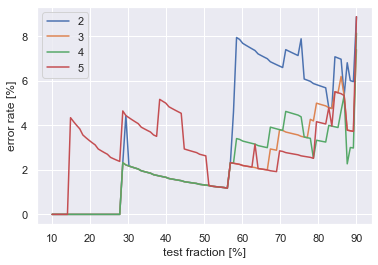

In [6]:
fracs = np.linspace(0.1, 0.9, 100)
for k in range(2, 6):
    error_rates = []
    for frac in fracs:
        X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=frac, random_state=1)
        model = KNearestNeighborWeightedClassifier(k=k, smear=1)
        model.fit(X_train, y_train)
        error_rates.append(test(model, X_test, y_test, verbose=False))
    plt.plot(fracs*100, np.asarray(error_rates)*100, label=k)
plt.legend()
plt.xlabel('test fraction [%]')
plt.ylabel('error rate [%]')
